---
title: |
  Only You:
  A Field Experiment of Text Message to Prevent Free-riding in Japan Marrow Donor Program
author:
  - name: Hiroki Kato
    affiliations:
      - Graduate School of Economics, Osaka University, Japan
  - name: Fumio Ohtake
    affiliations:
      - Graduate School of Economics, Osaka University, Japan
      - Center for Infectious Disease Education and Research (CiDER), Osaka University, Japan
  - name: Saiko Kurosawa
    affiliations:
      - Department of Oncology, Ina Central Hospital, Japan
  - name: Kazuhiro Yoshiuchi
    affiliations:
      - Graduate School of Medicine, Tokyo University, Japan
  - name: Takahiro Fukuda
    affiliations:
      - Department of Hematopoietic Stem Cell Transplantation, National Cancer Center Hospital, Japan
jupyter:
  kernelspec:
    display_name: IR 4.2
    language: R
    name: ir42
pdf-engine: lualatex
format:
  pdf:
    documentclass: article
    papersize: a4paper
    fig-format: pdf
    fig-width: 15
    fig-height: 10
    toc: false
    number-sections: true
    keep-tex: true
    latex-output-dir: docs/PDF
    include-in-header:
      - tex/header.tex
execute:
  echo: false
  warning: false
  enabled: true
---

In [1]:
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

In [2]:
#| include: false

library(here)
library(IRdisplay)
source(here("R", "_library.r"))
source(here("R", "_outcome_labels.r"))

root <- "D:/JMDPフィールド実験"

# Field Experiment
## Background: Coordination Process of JMDP

骨髄バンクに登録したドナー候補者が幹細胞を提供するために、以下の工程がある

1. 適合通知の返信
    - 骨髄バンクに登録した患者のHLAが一致すると、骨髄バンクはその候補者に幹細胞提供を依頼する適合通知を受け取る
    - 適合通知を受け取ったドナー候補者は提供の意向を示して返信する
1. 確認検査
    - 1カ月以内に実施される
    - コーディネーターが提供方法を詳細に説明をし、ドナーの意思や家族の同意について調査する
    - 調整医師が問診、診察、感染症の有無や血液型を調べる一般血液検査を実施する
    - 骨髄バンクが設定している基準を満たしているかどうかを検査する
1. 第一候補者選定
    - 患者は同時に最大10人のドナーとのコーディネーションを進められる
    - 患者の主治医はその中から最もドナーに適した候補者を選ぶ
    - 重要なことは、ドナー候補者は患者が何人のドナーとのコーディネーションを進めているかを知ることができない。また、コーディネーターや調整医師も知らないので、ドナー候補者はその情報を得られない。
1. 最終同意
    - 第一候補者に選定されたドナーは、コーディネーターと調整医師からの説明を再度受けて、最終的な意思決定をする
    - ドナーは自身の意思だけでなく、家族の代表者の同意も必要である
    - 最終同意後、ドナーは自身の意向を変えられない
1. 採取
    - 最終同意後、術前検査と採取準備（貧血を防ぐための自己血採血）を実施する
    - 採取のために1週間程度の入院が必要である
    - 確認検査から採取まで3～4カ月程度かかる

## Experimental Design

- ドナー候補者確定後、骨髄バンクは対象者に幹細胞提供を依頼する「適合通知」と、それを郵送した旨を伝えるSNSメッセージを送付する。
- 適合通知の全文
  - この度、あなたと骨髄バンクの登録患者さんのHLA型（白血球の型）が一致し、ドナー候補者のおひとりに選ばれました。今後、ご提供に向け詳しい検査や面談を希望されるかをお伺いしたく連絡させていただきました。同封の資料をよくお読みいただき、コーディネートが可能かどうか検討の上、この案内が届いてから7日以内に返信用紙ほかをご返送ください。返送後、コーディネートを進めさせていただく場合は、担当者よりご相談のお電話を差し上げますのでよろしくお願い申し上げます。
- 我々の介入は行動科学の知見に基づくメッセージを適合通知に加える。
  - 確率メッセージ「1人の登録患者さんとHLA型が一致するドナー登録者は数百〜数万人に1人です。ドナー候補者が複数みつかる場合もありますが、多くはないこともご理解頂ければ幸いです。」
  - 患者情報メッセージ「骨髄バンクを介して移植ができる患者さんは約6割です。骨髄等を提供するドナーが早く見つかれば、その比率を高めることができます。」
- これらのメッセージの目的はコーディネーションを促進することである。ただし、我々はドナー候補者に過度なプレッシャーを与えないように適切な配慮をして、メッセージを作成した。
  - 嘆願調のようなメッセージを避けている
  - メッセージの作成に際して、骨髄バンクが公開している情報のみを使用している
  - 移植リスクに関する説明はこれまでと同様の方法で実施している
- 二つの介入メッセージの効果を推定するために、我々は3つの実験群を設ける。
  - 実験群A：介入メッセージなし
  - 実験群B：確率メッセージ
  - 実験群C：患者情報メッセージ
- さらに、情報過多による認知負荷の負の影響を検証するために、二つの介入メッセージを両方加えた適合通知を送付する実験群Dも設ける。

In [3]:
#| include: false

schedule <- read_csv(here(root, "RCT-schedule.csv"))

Rows: 24 Columns: 7


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): treat
dbl  (4): year, month, week, RCTweek
date (2): start_date, end_date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#| output: asis

schedule %>%
  mutate(
    my = paste0(month, "/", year - 2000),
    my = factor(
      my,
      levels = c("9/21", "10/21", "11/21", "12/21", "1/22", "2/22"),
      labels = c("Sep 21", "Oct 21", "Nov 21", "Dec 21", "Jan 22", "Feb 22")
    ),
    week = factor(week, levels = 1:4, labels = paste("Week", 1:4))
  ) %>%
  dplyr::select(week, my, treat) %>%
  pivot_wider(values_from = treat, names_from = my) %>%
  kable(
    caption = 'Assignment Schedule',
    align = 'lcccccc',
    format = 'latex',
    booktabs = TRUE,
    linesep = ""
  ) %>%
  kableExtra::kable_styling() %>%
  print()
  # as.character() %>%
  # display_html()

\begin{table}

\caption{Assignment Schedule}
\centering
\begin{tabular}[t]{lcccccc}
\toprule
week & Sep 21 & Oct 21 & Nov 21 & Dec 21 & Jan 22 & Feb 22\\
\midrule
Week 1 & B & C & C & D & B & A\\
Week 2 & D & B & A & A & C & B\\
Week 3 & A & D & B & C & D & C\\
Week 4 & C & A & D & B & A & D\\
\bottomrule
\end{tabular}
\end{table}


- 我々は2021年9月から2022年2月にかけて骨髄バンクが適合通知を送付したドナー候補者11,154名をフィールド実験の対象とした。
- 実験群の割り当ては骨髄バンク事務局の業務の無理のない範囲で週単位でクラスターランダム化した。
  - 週・月の固定効果を取り除けるように、実験群が週・月でバランスするように割り当てた。
  - 割り当てのスケジュールは上表にまとめている

## Data and Empirical Strategy

In [5]:
#| include: false

rawdt <- read_csv(here(root, "shaped.csv"), locale = locale(encoding = "cp932"))

use <- rawdt %>%
  dplyr::filter(ongoing == 0) %>%
  mutate(
    treat = factor(treat, levels = LETTERS[1:4]),
    plan_two_methods = if_else(plan_method == "BM/PB", 1, 0)
  )

Rows: 11153 Columns: 39


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): treat, prefecture, reasonBM, reasonPB, plan_method, method
dbl  (31): year, month, week, RCTweek, id, sentenceB, sentenceC, toka, male,...
date  (2): start_date, end_date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
#| include: false

lm_robust(
  ongoing ~ treat,
  data = rawdt,
  cluster = RCTweek,
  se_type = "stata"
) %>%
{
  f <- summary(.)$fstatistic[1]
  numdf <- summary(.)$fstatistic[2]
  dendf <- summary(.)$fstatistic[3]
  p <- pf(f, numdf, dendf, lower.tail = FALSE)

  sprintf("F-value = %1.3f; p-value = %1.3f", f, p)
}

[1] "F-value = 0.105; p-value = 0.956"

- 我々は2022年6月末に骨髄バンクが管理するコーディネーションデータの提供を受けた。
  - 観測単位はフィールド実験の対象であるドナー候補者である
  - 個人属性として性別・年齢・過去のコーディネーション回数・居住地域（都道府県レベル）を記録している
  - コーディネーションの過程について、提供に至るまでの各工程に到達したかどうかを記録しており、これらをアウトカム変数として用いる
  - 適合通知の返信については、返信したかどうかに加えて、返信日数・提供意向についても記録きろくしている
  - コーディネーションが途中で中断した場合、その理由を三つのカテゴリー（患者理由・ドナーの健康以外の理由・ドナーの健康上の理由）で記録している
- 追加的なデータとして、JMDPがホームページ上で公開している施設リストを用いる
  - このデータは病院の住所に加えて、骨髄採取が可能かどうか、末梢血幹細胞採取が可能かどうかを含んでいる
  - 我々はこのデータを都道府県レベルで集計して、10平方キロメートル当たりの病院の数を計算し、コーディネーションデータと都道府県をキーとして突合する
  - この変数をコーディネーションや提供の移動コストとみなす
- 分析対象は分析対象は国内在住でコーディネーションが完全に終了している11,049名とする。
  - 海外に在住する人が1名いた
  - 現在もコーディネーションが進行している人が104名いた
  - コーディネーションの進行中の比率は実験群でバランスしている（F-value, p-value = $0.956$）

In [7]:
#| output: asis

balance_test <- use %>%
  select(
    male,
    age,
    coordinate,
    plan_two_methods,
    hospital_per_area,
    PB_per_area,
    BM_per_area,
    treat,
    RCTweek
  ) %>%
  pivot_longer(male:BM_per_area, values_to = "value", names_to = "vars") %>%
  group_by(vars) %>%
  do(est = lm_robust(
    value ~ treat,
    clusters = RCTweek,
    se_type = "stata",
    data = .
  )) %>%
  summarize(
    vars = vars,
    f = summary(est)$fstatistic[1],
    numdf = summary(est)$fstatistic[2],
    dendf = summary(est)$fstatistic[3],
    "F-test, p-value" = pf(f, numdf, dendf, lower.tail = FALSE)
  )

size <- with(use, sprintf("%1d", table(treat))) %>%
  {
    tribble(
      ~terms, ~A, ~B, ~C, ~D, ~"F-test, p-value",
      "通常の適合通知", "X", "X", "X", "X", "",
      "確率メッセージ", "", "X", "", "X", "",
      "患者情報メッセージ", "", "", "X", "X", "",
      "サンプルサイズ", .[1], .[2], .[3], .[4], ""
    )
  }

attr(size, "position") <- seq(nrow(size))

use %>%
  datasummary(
    (`Male (=1)` = male) +
    (`Age` = age) +
    (`Number of past coordinations` = coordinate) +
    (`Planned harvest method: BM and PBMC` = plan_two_methods) +
    (`Number of listed hospitals` = hospital_per_area) +
    (`Number of hospitals listed with PBSC collection` = PB_per_area) +
    (`Number of hospitals listed with BM collection` = BM_per_area) ~ mean * treat,
    data = .,
    title = "Overview of Field Experiment",
    add_rows = size,
    add_columns = balance_test[c(5, 1, 3, 7, 4, 2, 6), 5],
    align = "lccccc",
    output = "latex"
  ) %>%
  kableExtra::kable_styling() %>%
  add_header_above(c(" " = 1, "Experimental Arms" = 4, " " = 1)) %>%
  group_rows("A. Interventions", 1, 3) %>%
  group_rows("B. Sample Size", 4, 4) %>%
  group_rows("C. Covariates, Balance Test", 5, 11) %>%
  print()
  # as.character() %>%
  # display_html()

\begin{table}

\caption{Overview of Field Experiment}
\centering
\begin{tabular}[t]{lccccc}
\toprule
\multicolumn{1}{c}{ } & \multicolumn{4}{c}{Experimental Arms} & \multicolumn{1}{c}{ } \\
\cmidrule(l{3pt}r{3pt}){2-5}
  & A & B & C & D & F-test, p-value\\
\midrule
\addlinespace[0.3em]
\multicolumn{6}{l}{\textbf{A. Interventions}}\\
\hspace{1em}通常の適合通知 & X & X & X & X & \\
\hspace{1em}確率メッセージ &  & X &  & X & \\
\hspace{1em}患者情報メッセージ &  &  & X & X & \\
\addlinespace[0.3em]
\multicolumn{6}{l}{\textbf{B. Sample Size}}\\
\hspace{1em}サンプルサイズ & 2535 & 3053 & 2726 & 2735 & \\
\addlinespace[0.3em]
\multicolumn{6}{l}{\textbf{C. Covariates, Balance Test}}\\
\hspace{1em}Male (=1) & \num{0.62} & \num{0.63} & \num{0.63} & \num{0.61} & \num{0.36}\\
\hspace{1em}Age & \num{38.38} & \num{38.12} & \num{37.45} & \num{37.98} & \num{0.07}\\
\hspace{1em}Number of past coordinations & \num{1.61} & \num{1.59} & \num{1.62} & \num{1.56} & \num{0.45}\\
\hspace{1em}Planned harvest method: BM and PBMC & \num{0.87}

- 上表はフィールド実験を概観している
  - パネルAは各実験群の介入をまとめており、パネルBは各実験群のサンプルサイズを示している
  - パネルCは共変量のバランステストの結果を示しており、割り当てのランダム化が成功しているかどうかを検証している
  - ほとんどの共変量は群間でバランスしているが、ドナー候補者の年齢は群間でアンバランスである可能性がある（F-test, p-value = $0.07$）
  - 実験群C・Dのドナー候補者は実験群A・Bのドナー候補者よりも若い
- ドナー候補者は実験群を選択できない、すなわち、実験群は外生的であるので、単純な二群比較は平均処置効果を識別できる。
  - 一部の共変量、および割り当ての週と月が実験群間で完全にバランスしていないので、単純な二群比較はバイアスを伴う可能性がある
  - そこで、我々は以下の線形確率モデルを推定する（$X_i$は個人属性ベクトル、$\lambda_m$と$\theta_w$はそれぞれ週・月のダミー変数）

\begin{equation}
  Y_{imw} =
  \beta_1 \cdot \text{B}_{mw} + \beta_2 \cdot \text{C}_{mw}
  + \beta_3 \cdot \text{D}_{mw}
  + X'_i \gamma + \lambda_m + \theta_w + u_{imw}
\end{equation}

# Effects on Reply and Intentions

In [8]:
stock <- use %>%
  dplyr::filter(exg_stop_reply == 0) %>%
  rename(positive = intention) %>%
  mutate(
    negative = reply * (1 - positive),
    age_demean = age - mean(rawdt$age),
  ) %>%
  select(reply, positive, negative, everything()) %>%
  pivot_longer(reply:negative, "outcome") %>%
  mutate(outcome = factor(
    outcome,
    levels = unlist(names(outcome_label)[1:3]),
    labels = unlist(outcome_label[1:3])
  ))


- ドナー候補者の意向が最も現れる返信に対する効果を推定する
  - 返信のアウトカム変数は提供意向に関わらず適合通知に返信したらならば1を取るダミー変数
- さらに、返信に対する効果を提供意向の観点から分解する
  - 正の意向は適合通知に返信し、かつ提供の意向を示したならば1を取るダミー変数
  - 逆に、負の意向は適合通知に返信し、かつ提供の意向を示さなければ1を取るダミー変数
  - 適合通知に返信しなかった場合、正の意向と負の意向のアウトカム変数を0とコードする
  - したがって、二つの意向に対する効果の和は必ず返信に対する効果となる
  - コントロール（実験群A）の返信率は$88.35$%である。正の意向を伴って返信した比率は$55.33$%である一方で、負の意向を伴って返信した比率は$33.03$%である
  - よって、返信者の$62.63$%が正の意向を持っている
- 返信をする以前に患者側の都合でコーディネーションが中断してしまう可能性がある
  - このケースはドナー候補者の意向と無関係に生じるコーディネーションの中断なので、分析のサンプルから除外する
  - 各実験群の$0.5$--$0.7$%をこのケースで除外しており、その比率は群間でバランスしている

## Estimation Results

In [9]:
#| output: asis

mod <- list(
  unctrl = value ~ treat,
  ctrl = value ~ treat + age_demean + I(age_demean^2) + male + coordinate +
    plan_two_methods + hospital_per_area + PB_per_area + BM_per_area +
    factor(prefecture) + factor(month) + factor(week)
)

est_stock <- stock %>%
  group_by(outcome) %>%
  nest() %>%
  mutate(
    fit1 = map(
      data,
      ~ lm_robust(
        mod$unctrl,
        data = .,
        cluster = RCTweek,
        se_type = "stata"
      )
    ),
    fit2 = map(
      data,
      ~ lm_robust(
        mod$ctrl,
        data = .,
        cluster = RCTweek,
        se_type = "stata"
      )
    )
  ) %>%
  pivot_longer(
    fit1:fit2,
    names_prefix = "fit",
    names_to = "model",
    values_to = "fit"
  )

ctrl_avg <- stock %>%
  dplyr::filter(treat == "A") %>%
  group_by(outcome) %>%
  summarize(mean = sprintf("%1.4f", mean(value)))

add_table <- tibble::tribble(
  ~term, ~"(1)", ~"(2)", ~"(3)", ~"(4)", ~"(5)", ~"(6)",
  "Control average", ctrl_avg$mean[1], ctrl_avg$mean[1],
  ctrl_avg$mean[2], ctrl_avg$mean[2],
  ctrl_avg$mean[3], ctrl_avg$mean[3],
  "Covariates", "", "X", "", "X", "", "X"
)

attr(add_table, "position") <- 9:12

est_stock %>%
  pull(fit) %>%
  setNames(paste0("(", seq_len(length(.)), ")")) %>%
  modelsummary(
    title = "Linear Probability Model of Replay and Intention",
    coef_map = c(
      "(Intercept)" = "Constant",
      "treatB" = "Treatment B",
      "treatC" = "Treatment C",
      "treatD" = "Treatment D"
    ),
    stars = c("***" = .01, "**" = .05, "*" = .1),
    fmt = 4,
    gof_omit = "R2|AIC|BIC|Log|Std|FE|se_type",
    add_rows = add_table,
    output = "latex"
  ) %>%
  kableExtra::kable_styling() %>%
  kableExtra::add_header_above(c(
    " " = 1, "Reply" = 2, "Positive" = 2, "Negative" = 2
  )) %>%
  kableExtra::add_header_above(c(
    " " = 3, "Intention" = 4
  )) %>%
  kableExtra::footnote(
    paste(
      "* p < 0.1, ** p < 0.05, *** p < 0.01.",
      "Standard errors clustered by experimental weeks",
      "are reported in parentheses.",
      "Covariates are gender, squared polynomial of (demeaned) age,",
      "a dummy indicating that planned harvest method are BM and PBMC,",
      "number of past coordinations,",
      "number of hospitals per 10 square kilometers,",
      "number of hospitals with PBSC collection per 10 square kilometers,",
      "number of hospitals with BM collection per 10 square kilometers,",
      "prefecture dummies, month dummies, and week dummies."
    ),
    threeparttable = TRUE
  ) %>%
  print()
  # as.character() %>%
  # display_html()

\begin{table}

\caption{Linear Probability Model of Replay and Intention}
\centering
\begin{threeparttable}
\begin{tabular}[t]{lcccccc}
\toprule
\multicolumn{3}{c}{ } & \multicolumn{4}{c}{Intention} \\
\cmidrule(l{3pt}r{3pt}){4-7}
\multicolumn{1}{c}{ } & \multicolumn{2}{c}{Reply} & \multicolumn{2}{c}{Positive} & \multicolumn{2}{c}{Negative} \\
\cmidrule(l{3pt}r{3pt}){2-3} \cmidrule(l{3pt}r{3pt}){4-5} \cmidrule(l{3pt}r{3pt}){6-7}
  & (1) & (2) & (3) & (4) & (5) & (6)\\
\midrule
Constant & \num{0.8835}*** & \num{0.9692}*** & \num{0.5533}*** & \num{0.6909}*** & \num{0.3303}*** & \num{0.2784}***\\
 & (\num{0.0065}) & (\num{0.0195}) & (\num{0.0125}) & (\num{0.0288}) & (\num{0.0089}) & (\num{0.0248})\\
Treatment B & \num{0.0105} & \num{0.0131}** & \num{0.0218} & \num{0.0203}* & \num{-0.0113} & \num{-0.0073}\\
 & (\num{0.0075}) & (\num{0.0061}) & (\num{0.0135}) & (\num{0.0122}) & (\num{0.0094}) & (\num{0.0075})\\
Treatment C & \num{-0.0057} & \num{0.0001} & \num{-0.0053} & \num{-0.0063} & \nu

- 上表は線形確率モデルの推定結果である
  - 奇数列は実験群ダミーのみを説明変数として用いているのに対して、偶数列は個人属性や月・週の固定効果も制御している
  - すべての特定化で標準誤差をランダム化のユニットである実験週レベルでクラスタしている
- 列(1)では、実験群Bは返信率を$0.01$もしくは$1.2$%高めている
  - 個人属性などをコントロールすると、効果のサイズは大きく変化しないが、統計的に5%水準で有意となる
  - 実験群Bの正の効果は正の意向を伴った返信への大きな効果から来ている。列(3)と(5)では、実験群Bが正の意向を伴った返信率を$0.02$もしくは$3.94$%高めている一方で、負の意向を伴った返信率を$0.01$もしくは$3.42$%下げている。ただし、これらは統計的に非有意である。
- 実験群CとDは実験群Bよりも効果のサイズが小さく、統計的に非有意である。さらに、ロジット推定は効果の方向について上表と整合的な結果となるが、統計的に非有意である。総合すると、我々の介入は全体的に返信に大きな影響を与えていない。

3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




3 coefficients  not defined because the design matrix is rank deficient




Adding missing grouping variables: `outcome`


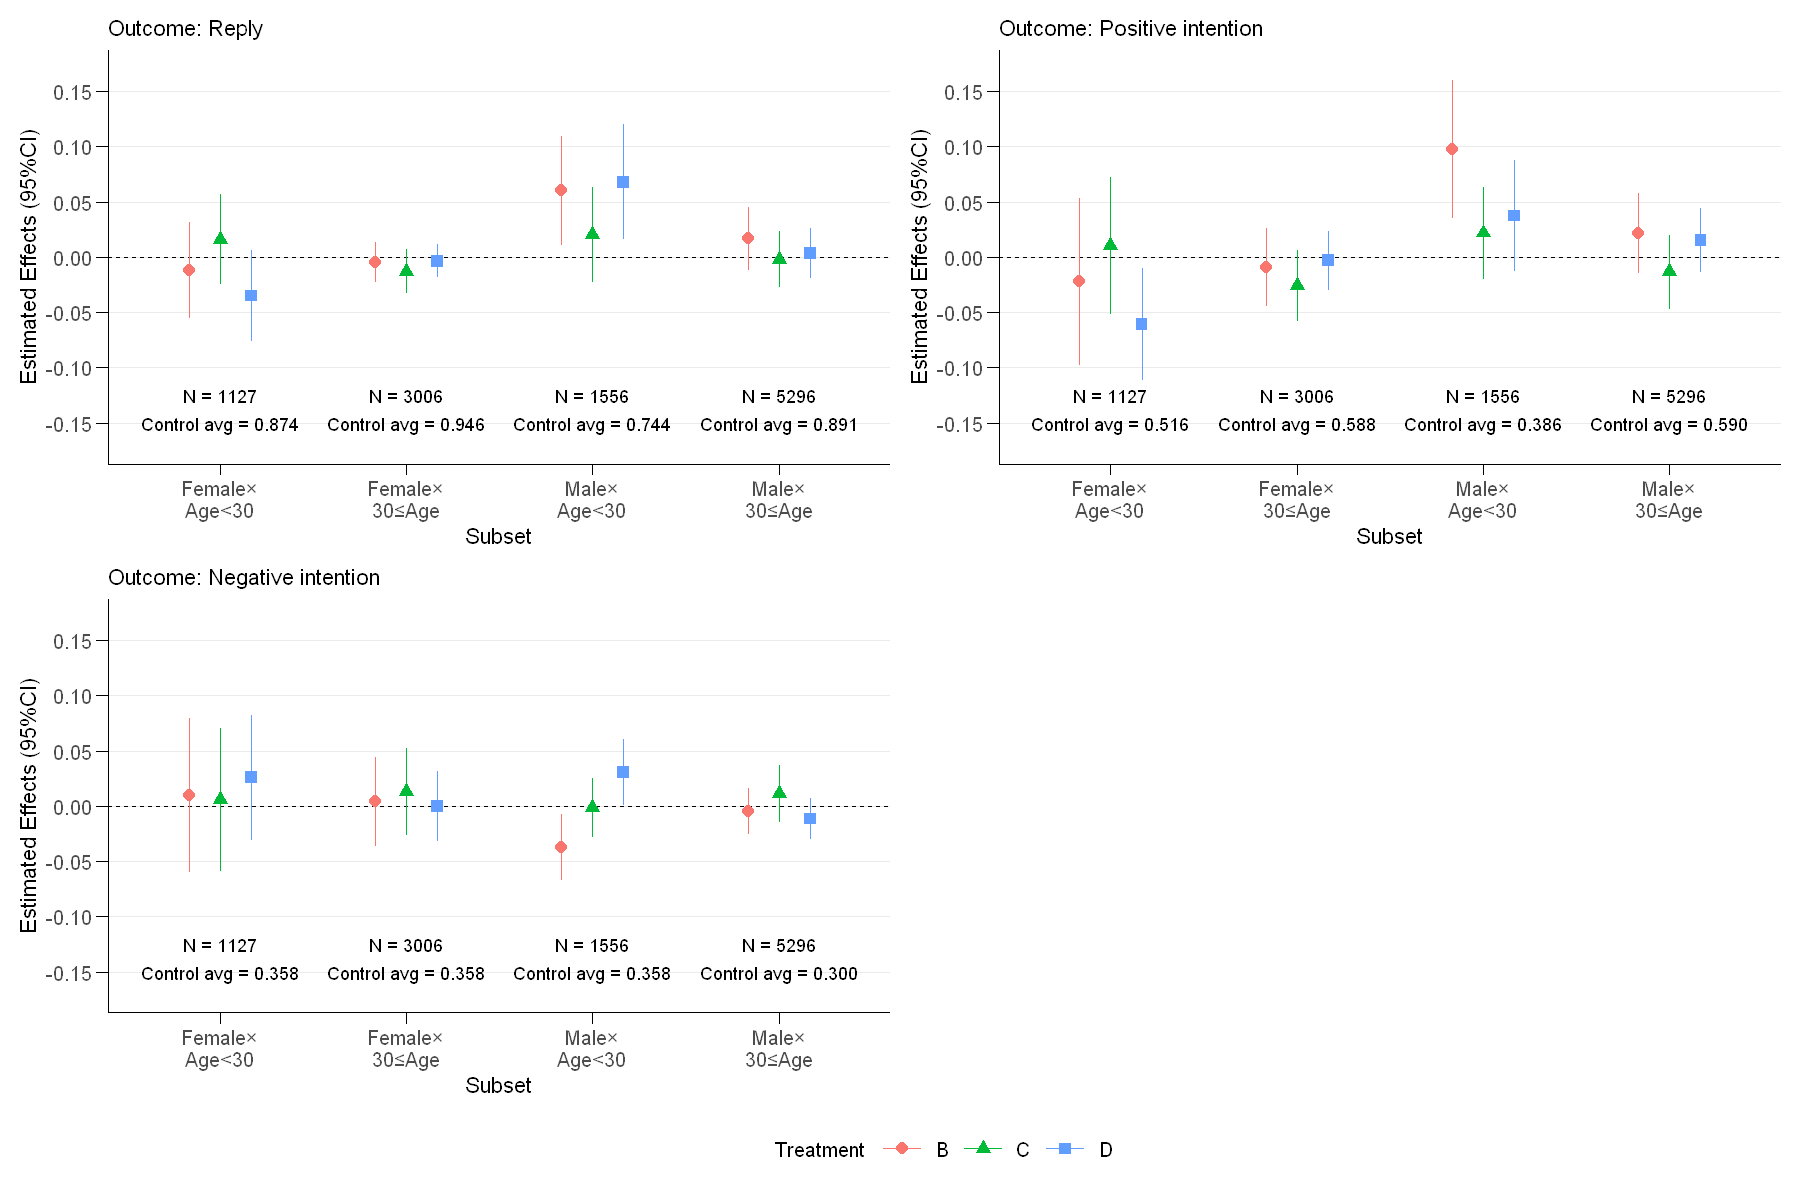

In [10]:
#| label: reg-reply-stock-subsample
#| fig-cap: 'Effect on Reply and Intentions by Gender and Age Group. Note: These plots show the average effect (and associated 95% confidential interval) on each outcome by gender and age group. We cluster standard errors by experimental weeks. We control number of past coordinations, number of hospitals per 10 square kilometers, number of hospitals with PBSC collection per 10 square kilometers, number of hospitals with BM collection per 10 square kilometers, prefecture dummies, month dummies, and week dummies.'

est_stock_sub <- stock %>%
  mutate(age_less30 = if_else(age < 30, 1, 0)) %>%
  group_by(outcome, male, age_less30) %>%
  nest() %>%
  mutate(est = map(data, ~ lm_robust(
    update(mod$ctrl, . ~ . - male - age_demean),
    cluster = RCTweek,
    se_type = "stata",
    data = .x
  ))) %>%
  mutate(
    fit = map(est, tidy),
    fit = map(fit, ~ subset(.x, str_detect(term, "treat"))),
    fit = map(fit, ~ dplyr::select(.x, -outcome)),
    N = map_chr(est, ~ paste("N =", nobs(.x))),
    mean = map_dbl(data, ~ with(subset(., treat == "A"), mean(value))),
    mean = sprintf("Control avg = %1.3f", mean)
  ) %>%
  select(-data, -est) %>%
  unnest(cols = fit) %>%
  mutate(
    pos = paste0(male, age_less30),
    pos = factor(
      pos,
      levels = c("01", "00", "11", "10"),
      labels = c(
        "Female\u00d7\nAge<30",
        "Female\u00d7\n30\u2264Age",
        "Male\u00d7\nAge<30",
        "Male\u00d7\n30\u2264Age"
      )
    ),
    term = str_replace(term, "treat", ""),
    term = factor(term, LETTERS[2:4])
  )

text <- est_stock_sub %>%
  select(male, age_less30, pos, N, mean) %>%
  distinct()

plot_list <- unique(est_stock_sub$outcome) %>%
  purrr::map(function(x) {
    subset(est_stock_sub, outcome == x) %>%
      ggplot(aes(x = pos, y = estimate)) +
      geom_hline(aes(yintercept = 0), linetype = 2) +
      geom_point(
        aes(color = term, shape = term),
        size = 3, position = position_dodge(0.5)
      ) +
      geom_errorbar(
        aes(ymin = conf.low, ymax = conf.high, color = term),
        position = position_dodge(0.5),
        width = 0
      ) +
      geom_text(
        aes(y = -0.125, label = N),
        data = subset(text, outcome == x),
        color = "black"
      ) +
      geom_text(
        aes(y = -0.15, label = mean),
        data = subset(text, outcome == x),
        color = "black"
      ) +
      scale_y_continuous(
        breaks = seq(-0.2, 0.2, by = 0.05), limits = c(-0.17, 0.17)
      ) +
      labs(
        title = paste("Outcome:", x),
        x = "Subset",
        y = "Estimated Effects (95%CI)",
        color = "Treatment", shape = "Treatment"
      ) +
      simplegg()
  })

wrap_plots(plot_list, ncol = 2) +
  plot_layout(guides = "collect") &
  theme(legend.position = "bottom")

- メッセージの効果は大きな異質性がある
  - 上図は性別と年齢層（30歳未満かどうか）でサンプルを4分割して、各サブセットでメッセージの効果を推定している
- 実験群BとDは30歳未満の男性の返信率を$0.06$もしくは$8.06$%高めている。
  - とくに、実験群Bの返信に対する正の効果は、正の意向を伴う返信率を大きく高めていることに起因している。このグループで、実験群Bは正の意向を伴う返信率を$0.1$もしくは$25.91$%高めている一方で、負の意向を伴う返信率を$0.03$もしくは$8.38$%下げている。これらは統計的に有意な効果である。
  - 対して、他の性年代のグループ（とくに、30歳以上の男女）では、メッセージが返信や意向に大きな影響を与えていない。ただし、30歳未満の女性で、実験群Dが正の意向を伴う返信率を$0.05$もしくは$9.69$%下げている。
- したがって、他のドナー候補者が少ないというメッセージは若年男性の提供意向を高め、適合通知への返信を促している
  - 若年男性ドナーは移植成績が良いにも関わらず、提供意向が他の性年代よりも明らかに低いことを考慮すると、実験群Bのメッセージは移植コーディネーションの効率性を改善しているといえる